# Estimaciones de precios

---

[Conexión con base de datos](##Conexión-con-base-de-datos)

[Limpieza de datos](#Limpieza-de-datos)

[Metadata](#Metadata)

[Regresion polinómica](#Regresión-polinómica)

## Conexión con base de datos
---
Realiza la conexión con base de datos local que contiene datos históricos

In [1]:
from matplotlib.font_manager import json_load
import pandas as pd
import json
import os
import psycopg2 as ps
from datetime import date, datetime, timedelta
# %%
pd.set_option('display.max_columns', None)

In [2]:
os.getcwd()

'C:\\Users\\lacia\\OneDrive\\Documents\\10. TFI\\0. Labs'

In [3]:
#ps.connect(host=hostname,dbname=database,user=username,password=pwd,port=portid)
def connect_to_db(host_name,db_name,port,username,password):
    try:
        conn = ps.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = portid
        )
    except ps.OperationalError as e:
        raise e
    else:
        print("Connected!")
    return conn


In [4]:
# %%
#Parametros para conectarnos a la base de datos
hostname = "localhost"
database = 'precios_clarosdb'
username = 'postgres'
pwd = 'postgres'
portid = 5432
#conn = None
#cur = None



In [5]:
conn = connect_to_db(hostname,database,portid,username,pwd)

Connected!


In [6]:
def query(curr):
    consulta = ("""SELECT * FROM db_python;""")
    curr.execute(consulta)

In [7]:
curr = conn.cursor()

In [8]:
query(curr)

In [9]:
query_results = curr.fetchall()

In [10]:
columnas = ['key', 'bandera_id', 'lat', 'lng',
            'sucursalnombre', 'id_', 'sucursaltipo',
            'provincia', 'promo1_descripcion','promo1_precio',
            'preciolista','promo2_descripcion','promo2_precio',
            'actualizadohoy','direccion','banderadescripcion',
            'localidad','comerciorazonsocial','comercioid','marca','nombre',
           'presentacion','fecha']

In [11]:
df = pd.DataFrame(query_results, columns=columnas)

In [12]:
df.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.6036515,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.6764626,-58.4933966,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.6530744,-58.4814134,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.6262843,-58.4569877,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.0530892,-58.7606411,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24


## Limpieza de datos
---
Revisa tipo de datos obtenido y los convertimos de corresponder

In [13]:
df.describe()

,promo1_precio,preciolista,promo2_precio
count,48766.000000,883967.000000,169302.000000
mean,301.956851,300.008436,249.343296
std,97.320125,135.662823,123.814429
min,94.560000,0.000000,67.900000
25%,192.800000,167.660000,135.310000
50%,306.750000,320.100000,228.990000
75%,360.000000,383.000000,346.040000
max,602.650000,709.000000,556.400000


In [14]:
df.dtypes

key                     object
bandera_id              object
lat                     object
lng                     object
sucursalnombre          object
id_                     object
sucursaltipo            object
provincia               object
promo1_descripcion      object
promo1_precio          float64
preciolista            float64
promo2_descripcion      object
promo2_precio          float64
actualizadohoy          object
direccion               object
banderadescripcion      object
localidad               object
comerciorazonsocial     object
comercioid              object
marca                   object
nombre                  object
presentacion            object
fecha                   object
dtype: object

In [15]:
df['promo1_precio'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1153795     True
1153796     True
1153797     True
1153798     True
1153799     True
Name: promo1_precio, Length: 1153800, dtype: bool

In [16]:
df['lat'] = df['lat'].astype('float64')
df['lng'] = df['lng'].astype('float64')


In [17]:
df.describe()

,lat,lng,promo1_precio,preciolista,promo2_precio
count,875937.000000,875937.000000,48766.000000,883967.000000,169302.000000
mean,-35.328574,-60.459678,301.956851,300.008436,249.343296
std,3.861188,3.579406,97.320125,135.662823,123.814429
min,-54.830640,-72.336170,94.560000,0.000000,67.900000
25%,-34.858230,-60.947400,192.800000,167.660000,135.310000
50%,-34.618229,-58.506874,306.750000,320.100000,228.990000
75%,-34.562834,-58.423667,360.000000,383.000000,346.040000
max,-22.513508,-55.876680,602.650000,709.000000,556.400000


In [18]:
print(df['fecha'].min())
print(df['fecha'].max())

2022-06-11
2022-08-25


## Metadata
---
Obtiene datos dólar blue a fin de realizar correlaciones

Fuente https://www.ambito.com/contenidos/dolar-informal-historico.html 11/09/2022 14:25hs

In [22]:
import datetime
import matplotlib.pyplot as plt

In [20]:
df_dolar = pd.read_excel('./data/Dolar_Blue.xlsx')
df_dolar.head()

,fecha,compra,venta,promedio
0,2022-09-09,270,274,272.0
1,2022-09-08,276,280,278.0
2,2022-09-07,280,284,282.0
3,2022-09-06,272,276,274.0
4,2022-09-05,266,270,268.0


(array([19158., 19174., 19188., 19205., 19219., 19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

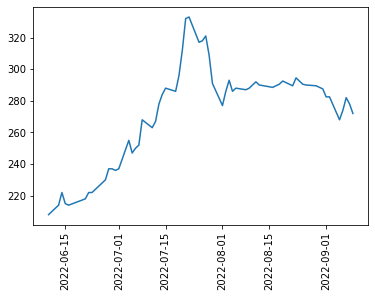

In [23]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

In [24]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     63 non-null     datetime64[ns]
 1   compra    63 non-null     int64         
 2   venta     63 non-null     int64         
 3   promedio  63 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 KB


In [25]:
df_dolar['fecha']

0    2022-09-09
1    2022-09-08
2    2022-09-07
3    2022-09-06
4    2022-09-05
        ...    
58   2022-06-16
59   2022-06-15
60   2022-06-14
61   2022-06-13
62   2022-06-10
Name: fecha, Length: 63, dtype: datetime64[ns]

In [26]:
#Completamos valores de sábado y domingo con el valor del día anterior
df_dolar = (df_dolar.set_index('fecha')
      .reindex(pd.date_range('2022-06-10', '2022-09-09', freq='D'))
      .rename_axis(['fecha'])
      .fillna(method='ffill')
      .reset_index())

In [27]:
df_dolar['fecha']

0    2022-06-10
1    2022-06-11
2    2022-06-12
3    2022-06-13
4    2022-06-14
        ...    
87   2022-09-05
88   2022-09-06
89   2022-09-07
90   2022-09-08
91   2022-09-09
Name: fecha, Length: 92, dtype: datetime64[ns]

In [28]:
df_dolar.head()

,fecha,compra,venta,promedio
0,2022-06-10,206.0,210.0,208.0
1,2022-06-11,206.0,210.0,208.0
2,2022-06-12,206.0,210.0,208.0
3,2022-06-13,212.0,216.0,214.0
4,2022-06-14,220.0,224.0,222.0


(array([19158., 19174., 19188., 19205., 19219., 19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

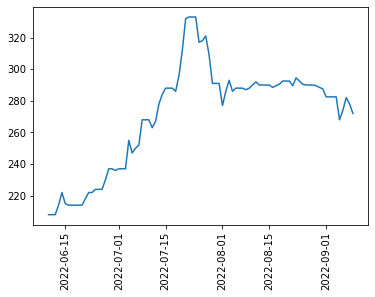

In [29]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

# Regresión polinómica

---

Regresión polinómica entre dolar paralelo y aumento de precios promedio por día por marca

In [46]:
import numpy
from sklearn.metrics import r2_score

C:\Users\lacia\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [31]:
lista = []
lista = df['marca'].unique()

print(lista)

['COCINERO' 'LIRA' 'TARAGUI' 'CAÑUELAS' 'MAÑANITA' 'FAVORITA' 'MORIXE'
 'CRUZ DE MALTA' 'PLAYADITO' 'LA MERCED' 'CASERITA']


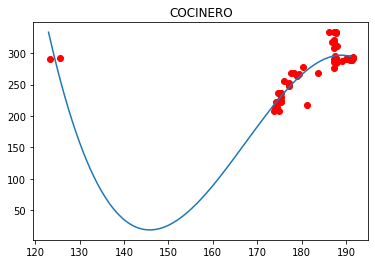

R2COCINERO
0.8125859529170693


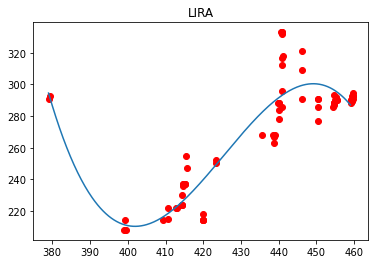

R2LIRA
0.8119049185079595


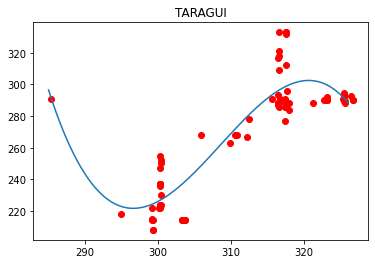

R2TARAGUI
0.8306706191315707


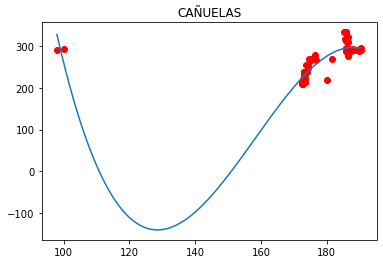

R2CAÑUELAS
0.77920536253847


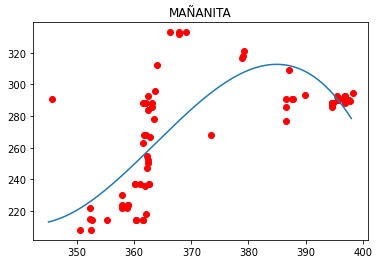

R2MAÑANITA
0.5040951230270176


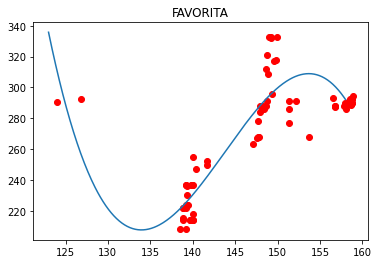

R2FAVORITA
0.8046707638944282


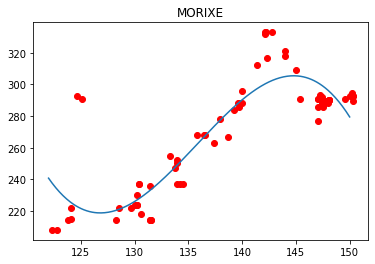

R2MORIXE
0.7550851808516825


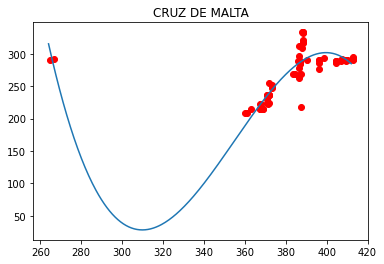

R2CRUZ DE MALTA
0.7603146101153473


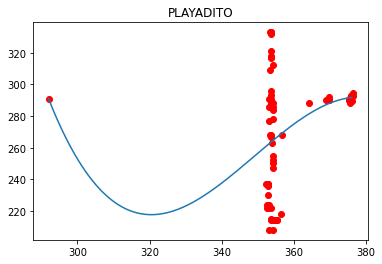

R2PLAYADITO
0.0999477132247627


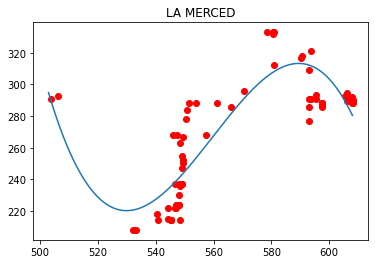

R2LA MERCED
0.7501538003159778


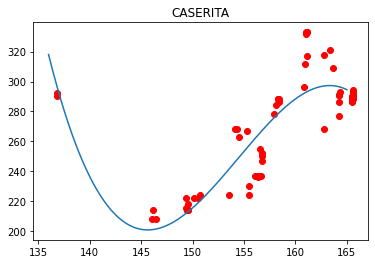

R2CASERITA
0.7900853710025892


In [48]:
for marca in lista:
    df_tmp = df[df['marca']==marca]
    df_tmp = df_tmp.groupby('fecha').mean()
    df_tmp = df_tmp.reset_index()
    df_tmp = (df_tmp.set_index('fecha')
      .reindex(pd.date_range('2022-06-11', '2022-08-25', freq='D'))
      .rename_axis(['fecha'])
      .fillna(method='ffill')
      .reset_index())
    df_tmp = pd.merge(df_tmp, df_dolar, on='fecha')
    x=df_tmp['preciolista']
    y=df_tmp['promedio']
    
    modelo = numpy.poly1d(numpy.polyfit(x, y, 3))

    linea = numpy.linspace(int(df_tmp['preciolista'].min()), int(df_tmp['preciolista'].max()), int(df_tmp['promedio'].max()))

    plt.scatter(x, y, c='Red')
    plt.plot(linea, modelo(linea))
    plt.title(marca)
    plt.show()
    print("R2 "+marca)
    print(r2_score(y, modelo(x)))
    

In [47]:
for marca in lista:
    df_tmp = df[df['marca']==marca]
    df_tmp = df_tmp.groupby('fecha').mean()
    df_tmp = df_tmp.reset_index()
    df_tmp = (df_tmp.set_index('fecha')
      .reindex(pd.date_range('2022-06-11', '2022-08-25', freq='D'))
      .rename_axis(['fecha'])
      .fillna(method='ffill')
      .reset_index())
    df_tmp = pd.merge(df_tmp, df_dolar, on='fecha')
    print('R2 '+marca+':')
    X = df_tmp['preciolista'].values.reshape(-1,1)
    y = df_tmp['promedio'].values
    regr.fit(X,y)
    Precio_pred = regr.predict(X)
    print(r2_score(y, Precio_pred))
    

R2 COCINERO:
0.1684451218757408
R2 LIRA:
0.47528018947770545
R2 TARAGUI:
0.6089136877965826
R2 CAÑUELAS:
0.0888856064990543
R2 MAÑANITA:
0.35274569716996895
R2 FAVORITA:
0.40385436193020896
R2 MORIXE:
0.6011893262690671
R2 CRUZ DE MALTA:
0.14455196436380213
R2 PLAYADITO:
0.03268616076624353
R2 LA MERCED:
0.4337590201066429
R2 CASERITA:
0.4409630332560288


La harina caserita sube 0,13 centavos por cada peso que sube el dolar blue

In [50]:
est = smf.ols('preciolista ~ promedio', df_tmp).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,122.9055,4.676,26.285,0.000,113.589,132.222
promedio,0.1314,0.017,7.640,0.000,0.097,0.166


In [ ]:
preciolista ~ promedio

In [40]:
regr = skl_lm.LinearRegression()

X = df_tmp['preciolista'].values.reshape(-1,1)
y = df_tmp['promedio'].values

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

-261.7250230072358
[3.35548405]


In [43]:
Precio_pred = regr.predict(X)
r2_score(y, Precio_pred)

0.4409630332560288

<AxesSubplot:xlabel='preciolista', ylabel='promedio'>

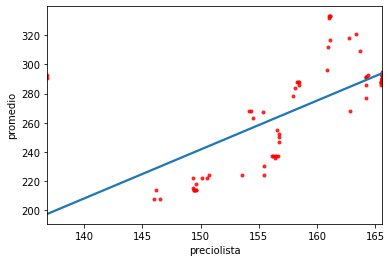

In [38]:
sns.regplot(x=df_tmp['preciolista'], y=df_tmp['promedio'], order=1, ci=None, scatter_kws={'color':'r', 's':9})

In [ ]:
#marcas disponibles
df['marca'].unique()

In [ ]:
#Crea variable con fecha limite

fecha_var = datetime.date(2022,8,23)

